In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from __future__ import division
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

data_path = "~/DA/dataset/Reviews.csv"
pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]
subset = pd_data[['UserId', 'Score']]
#pd_data[pd_data['UserId']=='A1Z54EM24Y40LL']


In [2]:
pd_20 = pd_data.head(20)
pd_sort = pd_data.sort_values(by='UserId', ascending=False)
#pd_sort.head(6)
#print(pd_sort.head(1).UserId)

In [ ]:
name = []
score = []
c = 0
s = 0
sum = {}#{'ID':'sum'}
count = {}#{'ID':'count'}
'''
for i in range(10000):
    name.append(pd_data['UserId'][i])
name = list(set(name))
for n in name:
    for i in range(10000):
        if (n==pd_data['UserId'][i]):
            c += 1
            s += pd_data['Score'][i]
    sum.update( {n : s} )
    count.update( {n : c} )
    c = 0
    s = 0
print(count)
print(sum)
'''
profile = []
for n in pd_sort['UserId']:
    name.append(n)
for a in pd_sort['Score']:
    score.append(a)
for p in pd_sort['ProfileName']:
    profile.append(p)
name_set = list(set(name))
name_set.sort(key=name.index)
j = 0
i = 0
while(i!=len(name_set)-1):
    #print(name_set[i],name[j])
    if (name_set[i]== name[j]):
        c+=1
        s+=score[j]
        j+=1
    else:
        sum.update( {name_set[i] : s} )
        count.update( {name_set[i] : c} )
        i += 1
        c = 0
        s = 0
import operator
count_sort = sorted(count.items(), key=operator.itemgetter(1),reverse=True)
#print(count)
mean = []
score_count = []
for i in range(10):
    #print(count_sort[i][0])
    #print(count_sort[i][0], sum[count_sort[i][0]], count_sort[i][1])
    mean.append(sum[count_sort[i][0]]/count_sort[i][1])
    score_count.append(count_sort[i][1])
profileName = []
UserId_set = []

In [9]:
for i in range(10):
    a = count_sort[i][0]
    UserId_set.append(count_sort[i][0])
    for j in range(len(name)):
        if a == name[j]:
            profileName.append(profile[j])
profileName_set = list(set(profileName))
profileName_set.sort(key=profileName.index)
final_dict = {
                "UserId":UserId_set,
                "ProfileName": profileName_set,
                "Score count": score_count,
                "Score mean" : mean
}
#print(len(profile),len(score_count),len(score_count))
final_df = pd.DataFrame(final_dict)
#df.transpose()
final_df

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
5,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6,A3NHUQ33CFH3VM,Citizen John,7,3.142857
7,AY12DBB0U420B,Gary Peterson,6,4.500000
8,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
9,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667


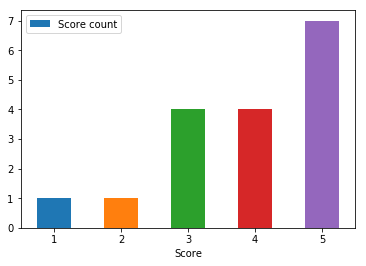

In [4]:
reviews = pd_data.loc[pd_data['UserId']==count_sort[0][0]]
reviews = reviews.groupby(['Score']).size()
reviews_count = []
for i in range(1,6):
    reviews_count.append(reviews[i])
df = pd.DataFrame({'Score':[1, 2, 3, 4, 5], 'Score count':reviews_count})
ax1 = df.plot.bar(x='Score', y='Score count', rot=1)


In [5]:
time = pd.to_datetime(pd_data['Time'],unit='s')
years = []
for i in range(10000):
    years.append(time[i].year)
year = list(set(years))
year_count = []
c = 0
for i in year:
    for j in range(10000):
        if(i==years[j]):
            c+=1
    year_count.append(c)
    c = 0
#year_count

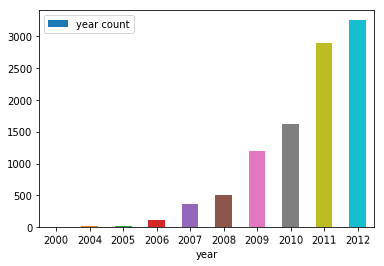

In [6]:
df = pd.DataFrame({'year':year, 'year count':year_count})
ax2 = df.plot.bar(x='year', y='year count', rot=1)

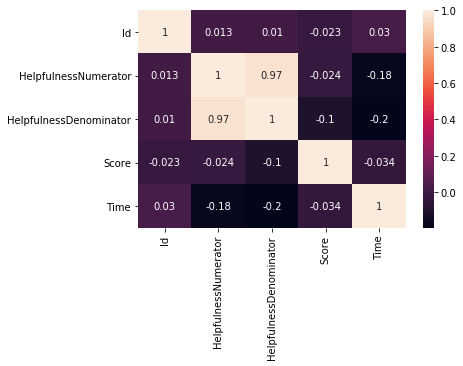

In [7]:
corr=pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']].corr()
#corr
#type(corr)
sns.heatmap(corr, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88bd0fed30>]],
      dtype=object)

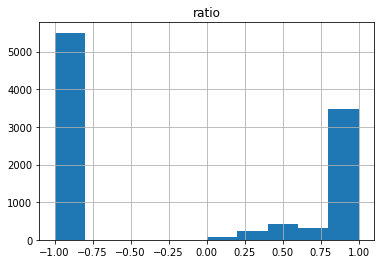

In [8]:
num_dem=pd.DataFrame(pd_data,columns=['HelpfulnessNumerator','HelpfulnessDenominator'])
#num_dem
help_percent = []
for i in range(10000):
    if num_dem['HelpfulnessNumerator'][i]==0&num_dem['HelpfulnessDenominator'][i]==0:
        help_percent.append(-1)
    elif num_dem['HelpfulnessNumerator'][i]>num_dem['HelpfulnessDenominator'][i]:
        pass
    else:
        help_percent.append(num_dem['HelpfulnessNumerator'][i]/num_dem['HelpfulnessDenominator'][i])
help_percent = pd.DataFrame({'ratio':help_percent})
help_percent.hist()